In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [2]:
data=sns.load_dataset('iris')
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [9]:
x = data['petal_length']
y = data['petal_width']
x = sm.add_constant(x)
result = sm.OLS(y,x).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           4.68e-86
Time:                        08:54:26   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3631      0.040     -9.131      0.000      -0.442      -0.285
petal_length     0.4158      0.010     43.387      0.000       0.397       0.435
==============================================================================
Omnibus:                        5.765   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.555
Skew:                           0.359   Prob(JB):                       0.0622
Kurtosis:                       3.611   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Análisis exploratorio de datos

In [10]:
import matplotlib.pyplot as plt

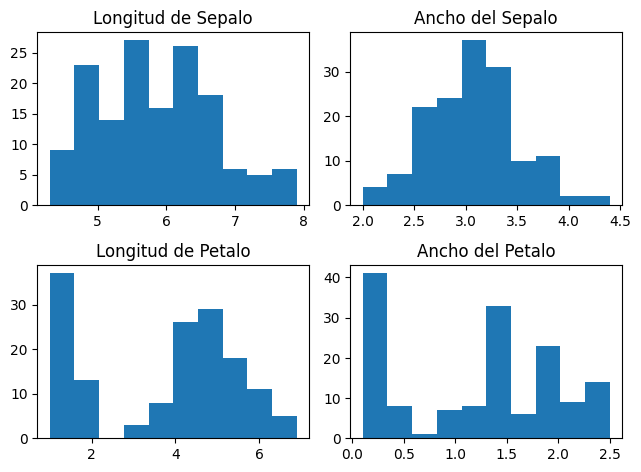

In [14]:
n_bins = 10
fig , axs = plt.subplots(2,2)
axs[0,0].hist(data['sepal_length'],bins=n_bins)
axs[0,0].set_title('Longitud de Sepalo')

axs[0,1].hist(data['sepal_width'],bins=n_bins)
axs[0,1].set_title('Ancho del Sepalo')

axs[1,0].hist(data['petal_length'],bins=n_bins)
axs[1,0].set_title('Longitud de Petalo')

axs[1,1].hist(data['petal_width'],bins=n_bins)
axs[1,1].set_title('Ancho del Petalo')
fig.tight_layout(pad=1.0);

## Diagrama de Box-plot

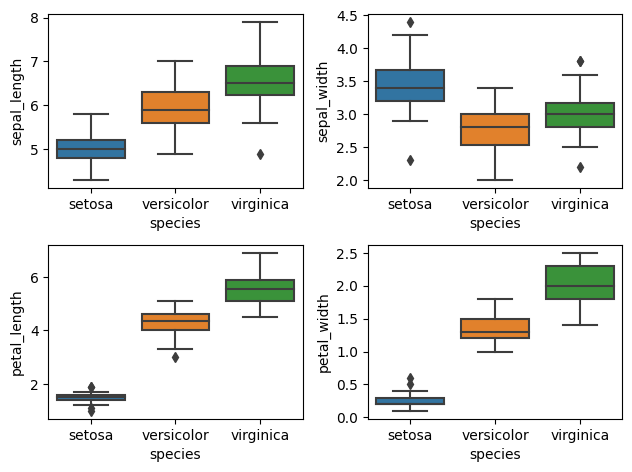

In [18]:
fig, axs = plt.subplots(2,2)
fn = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data=data, order= cn, ax = axs[0,0])
sns.boxplot(x = 'species', y = 'sepal_width', data=data, order= cn, ax = axs[0,1])

sns.boxplot(x = 'species', y = 'petal_length', data=data, order= cn, ax = axs[1,0])
sns.boxplot(x = 'species', y = 'petal_width', data=data, order= cn, ax = axs[1,1])
fig.tight_layout(pad=1.0);

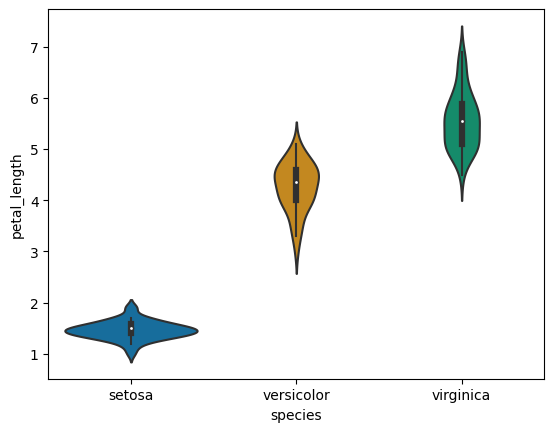

In [24]:
# Diagrama de violin

sns.violinplot(x = 'species', y = 'petal_length', data = data, size =5, order=cn, palette='colorblind');

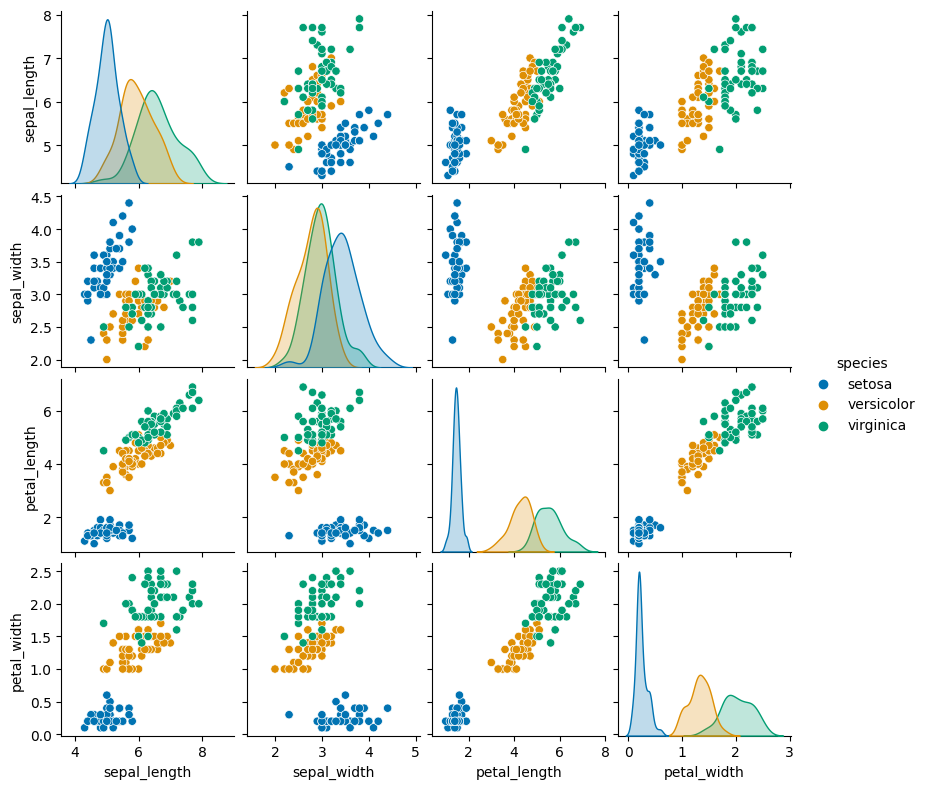

In [25]:
sns.pairplot(data=data,hue='species',height=2,palette='colorblind')

In [28]:
corrmat = data.corr()

C:\Users\danie\AppData\Local\Temp\ipykernel_12480\1838127317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


In [29]:
corrmat

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


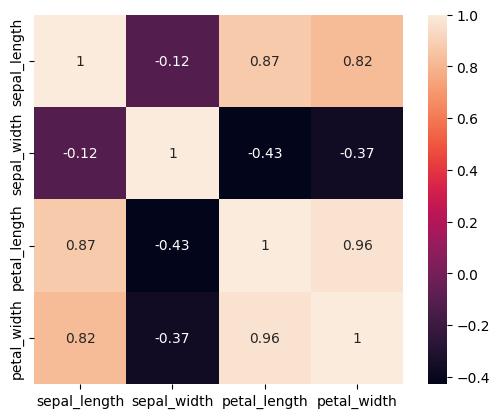

In [32]:
sns.heatmap(corrmat,annot=True,square=True);